<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/Handling_Missing_DataAndMlPipeline_grid_cv/Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lecture 1 Drop direct - check if it work

CCA -> means if 5% se kam data missing so un row ko hata de if jayada data ek col mein missing so remove the column itself

In [ ]:
df=sns.load_dataset("titanic")

In [ ]:
lo=[var  for var in df.columns  if df[var].isna().sum()/df.shape[0]*100<50 ]
#vo row le jsime 50 % se kam value null

In [ ]:
df1=df[lo]

step 2-> remove this rows with null
then baki bachi row ko plot karke dekho before after dist should not majorly change varna dikat hai

In [ ]:
df1.dropna(inplace=True)

/tmp/ipython-input-3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


<Axes: ylabel='Frequency'>

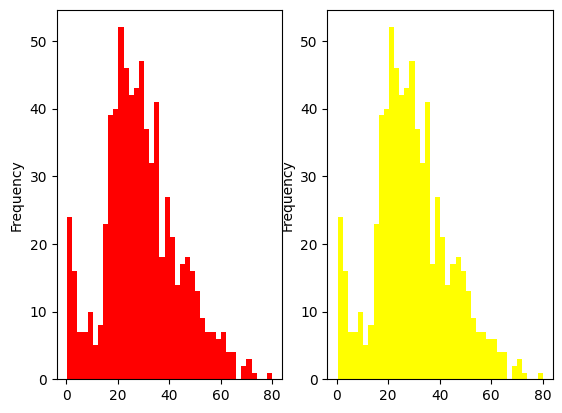

In [ ]:
plt.subplot(1,2,1)
df["age"].plot(kind="hist",bins=40,color="red")
plt.subplot(1,2,2)
df1["age"].plot(kind="hist",bins=40,color="yellow")

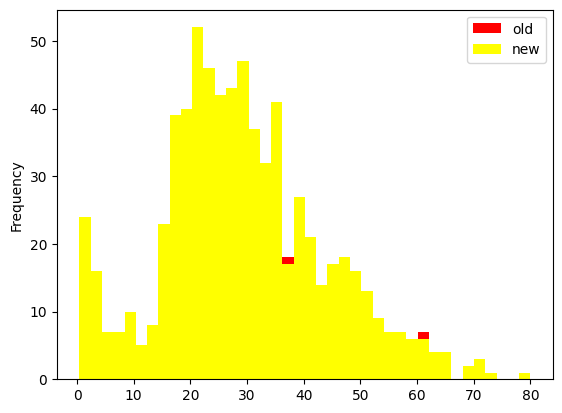

In [ ]:

df["age"].plot(kind="hist",bins=40,color="red",label="old")

df1["age"].plot(kind="hist",bins=40,color="yellow",label="new")
plt.legend( )
#so ek ke upar ek se aur behtar dekhega

ye aur clear image dega ki density kaise change

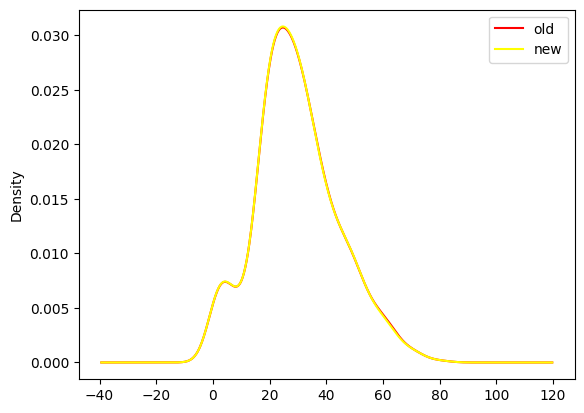

In [ ]:
df["age"].plot(kind="density",color="red",label="old")

df1["age"].plot(kind="density", color="yellow",label="new")
plt.legend( )
#so ek ke upar ek se aur behtar dekhega

tesra check if cca karne se dikkat ni

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


In [ ]:
temp=pd.concat([
    df["embarked"].value_counts()/len(df), #pehli kitni value counts aur variety thi baad mein ktini compare karne ke liye helpful
    df1["embarked"].value_counts()/len(df1)
],axis=1)

#so ek idea de dega ki kahi koi value dominate toh ni karne lag gayi pehle se ab mein if diff jayda toh dikkat
temp.columns=["old","new"]
temp



,old,new
embarked,,
S,0.722783,0.778090
C,0.188552,0.182584
Q,0.086420,0.039326


# Missing value computation   



```
Mean Median :
   ye use karte when kam data missing less then 5%
   disadv: dist. shape change , outlier , covariance or correlation change ho jata so
```



In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df=df[["age","sibsp","parch","survived"]]

In [ ]:
df["family"]=df["sibsp"]+df["parch"]

/tmp/ipython-input-417516315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["family"]=df["sibsp"]+df["parch"]


1 st way fill na

In [ ]:
df1=df.copy()
df1["age"]=df1["age"].fillna(df1["age"].mean()) # .median() bhi kar sakte ho


In [ ]:
# now we will see if change in var b/w new and old is drastic or not
print("new",df1["age"].var())
print("old",df["age"].var())
#var wii dec but it should not dec more or drsticlally

new 169.05239993721085
old 211.0191247463081


In [ ]:
df.cov()-df1.cov() #ye change should be small  inko alag alag chal ke bhi dekh sakta hai tu

,age,sibsp,parch,survived,family
age,41.966725,-8.279889e-01,-4.662043e-01,-1.096398e-01,-1.294193e+00
sibsp,-0.827989,-1.110223e-15,7.216450e-16,4.163336e-17,-5.773160e-15
parch,-0.466204,7.216450e-16,1.221245e-15,-9.714451e-17,1.776357e-15
survived,-0.109640,4.163336e-17,-9.714451e-17,2.220446e-16,-6.071532e-17
family,-1.294193,-5.773160e-15,1.776357e-15,-6.071532e-17,-3.108624e-15


In [ ]:
df1.corr()

,age,sibsp,parch,survived,family
age,1.000000,-0.232625,-0.179191,-0.069809,-0.248512
sibsp,-0.232625,1.000000,0.414838,-0.035322,0.890712
parch,-0.179191,0.414838,1.000000,0.081629,0.783111
survived,-0.069809,-0.035322,0.081629,1.000000,0.016639
family,-0.248512,0.890712,0.783111,0.016639,1.000000


<Axes: ylabel='Density'>

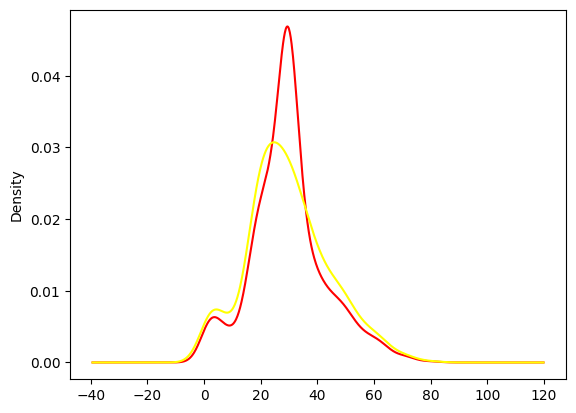

In [ ]:
df1["age"].plot(kind="kde",color="red")
df["age"].plot(kind="kde",color="yellow")
#so yaha pe dekhega ki naya jo age ka col uski vale peak kar gi achanak se not good

/tmp/ipython-input-3268984877.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


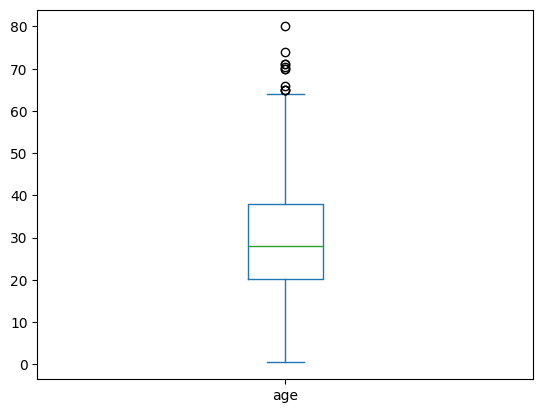

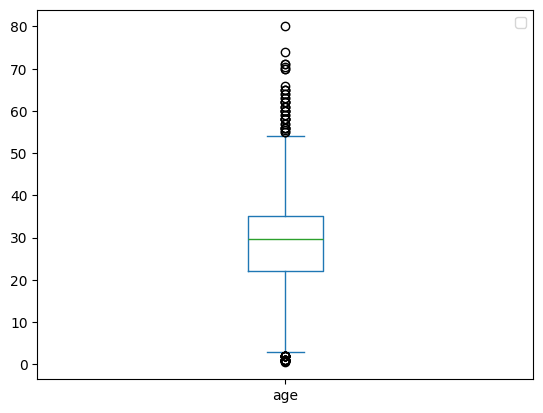

In [ ]:

df[["age"]].plot(kind="box",label="old")
df1[["age"]].plot(kind="box",label="new")


plt.legend()

#so purane wale mein kam outlier naye wale mein bahut sare outlier

2nd way simpleimputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer1=SimpleImputer(strategy="median")
df2=df.copy()
df2["age_mean"]=imputer.fit_transform(df2[["age"]])
df2["age_median"]=imputer1.fit_transform(df2[["age"]])#yaha pe [[]] lagana imp

In [ ]:
df2

,age,sibsp,parch,survived,family,age_mean,age_median
0,22.0,1,0,0,1,22.000000,22.0
1,38.0,1,0,1,1,38.000000,38.0
2,26.0,0,0,1,0,26.000000,26.0
3,35.0,1,0,1,1,35.000000,35.0
4,35.0,0,0,0,0,35.000000,35.0
...,...,...,...,...,...,...,...
886,27.0,0,0,0,0,27.000000,27.0
887,19.0,0,0,1,0,19.000000,19.0
888,NaN,1,2,0,3,29.699118,28.0
889,26.0,0,0,1,0,26.000000,26.0




```
Arbitary value
categorical col-> mein missing replace -> missing
numerical data -> missing ko replace it to -1 0 or 99 kuch aisa jo value na ho apke col mein jisse model differentiate kar paye ki ye alag hai



```




In [ ]:
df3=df.copy()

In [ ]:
df3["age"]=df3["age"].fillna(103)

In [ ]:
# sklearn us karke

imputer3=SimpleImputer(strategy="constant",fill_value=103) #or fill_value =="missing"
df3["age"]=imputer3.fit_transform(df3[["age"]])



```
   End of distribution system
   1. if apka col data normal dist check by skew -> replce nan with mean +3*standard dev or mean - 3*standard
   2. if replace with iqr values if skewed hai data  vdieo dekh https://www.youtube.com/watch?v=mCL2xLBDw8M&t=1376s
```





```
Missing category imputation -> mostly used in category data
most freq se replace
or missing laga de
```



In [ ]:
df

,age,sibsp,parch,survived,family
0,22.0,1,0,0,1
1,38.0,1,0,1,1
2,26.0,0,0,1,0
3,35.0,1,0,1,1
4,35.0,0,0,0,0
...,...,...,...,...,...
886,27.0,0,0,0,0
887,19.0,0,0,1,0
888,NaN,1,2,0,3
889,26.0,0,0,1,0


In [ ]:
imputer4=SimpleImputer(strategy="most_frequent")
df4=df.copy()
df4["age"]=imputer4.fit_transform(df4[["age"]])

# Missing value replace most used



```
Random Sample imptation
so hum rndom no. select and de dete missing val ko
Adv: as jo no. more vo jayada selct so dist mein zayda change ni and like jo no. kam vo bhi kahi na kahi chune jayege
 better for linear algo only
disadv:

isme apko pura train data apne sath rakhna padta when deploy jisse random no. se missing val ko replace so server pe ye cost add hoti

covariance ghata hai
```



In [ ]:
df5=df.copy()

In [ ]:
df5["age_imputed"]=df5["age"]

In [ ]:
# df5[df5["age_imputed"].isna()]["age_imputed"] ye bhi same kaam
df5["age_imputed"][df5["age_imputed"].isnull()]=df5["age"].dropna().sample(df5["age_imputed"].isnull().sum(),random_state=42).values # random state
df5["age_imputed"]

/tmp/ipython-input-4046392092.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df5["age_imputed"][df5["age_imputed"].isnull()]=df5["age"].dropna().sample(df5["age_imputed"].isnull().sum(),random_state=42).values # random state
/tmp/ipytho

,age_imputed
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,52.0
889,26.0




```
mssing indicator
  1. maan le ek col so ek alag col age ke liye so if har row m true false
  jayega such if row 34 mein age mein missing value toh vaha true ayega nayi
   col mein varna false ek indicator type
```



In [ ]:
df6=df.copy()
df6["indicator"]=np.where(df6["age"].isnull(),1,0)

In [ ]:
 #skelarn se
 from sklearn.impute import MissingIndicator

indicator = MissingIndicator(features="missing-only")  # ya "all"
new_Col = indicator.fit_transform(df6[["age"]])

# naye column ke naam lo
col_names = indicator.get_feature_names_out(["age"])

# DataFrame ke sath combine karo
df6_new = pd.concat([df6, pd.DataFrame(new_Col, columns=col_names, index=df6.index)], axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

si = SimpleImputer(add_indicator=True)
new_vals = si.fit_transform(df6[["age"]])

# naye column names lo (imputer ke + indicator ke)
col_names = si.get_feature_names_out(["age"])

df6_new = pd.concat([df6, pd.DataFrame(new_vals, columns=col_names, index=df6.index)], axis=1)


# Grid cv

In [ ]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv")

In [ ]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
7,1.0,constant,median,0.787852
6,1.0,constant,mean,0.787852
5,1.0,most_frequent,median,0.787852
4,1.0,most_frequent,mean,0.787852
11,10.0,constant,median,0.787852
10,10.0,constant,mean,0.787852
9,10.0,most_frequent,median,0.787852
8,10.0,most_frequent,mean,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852


# Knn imputer

Used like knn mein jiss row ki missing val usse baki non missing val ke sath dist baaki sare col use karke euclidian dist cal and sabse pas wale ki uss col ki value le le   
this is better

In [ ]:
from sklearn.impute import KNNImputer
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv",usecols=['Age','Pclass','Fare','Survived'])

In [ ]:

num_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns
cat_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
from sklearn.impute import KNNImputer
import pandas as pd

knn = KNNImputer(n_neighbors=3,weights="distance") # distance mein naya formula lag jata video dekh le
df_num = pd.DataFrame(knn.fit_transform(df[num_cols]), columns=num_cols)
df_final = pd.concat([df_num, df[cat_cols].reset_index(drop=True)], axis=1)


disadv -> isme apko apna pura xtrain dalana padta server pe so jab user new value  de toh vo purane data se calculate value if user ne vo field khali chod di toh

# Iterative imputer


steps :
 1. isme pehle hum sari nan ko col mean se fill
 2. then like age mein missing so baki col se model train and then predict karte ki baaki values se age mein kya fill kar sakte hai aise age ki nan values fill ho jaye
 3. then aise sare col ke liye karte hum har col ke liye algo train and then predict karne ki kosis
 4. ab jo val predict ki humne nan ki jagag